In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from multiprocessing import Pool

%matplotlib inline

In [4]:
files = glob.glob("/scratch/04101/vvenu/sparsity/epi/eval/LR*/*")

In [5]:
len(files)

107520

In [6]:
def read_json(file):
    
    index = os.path.basename(file).split(".")[0]
    
    with open(file,"r") as f:
        try:
            result = json.load(f)
        except:
            result = None
    
    return result

In [7]:
def read_all(files):
    
    results = []
    
    with Pool() as pool:
        
        for i,result in enumerate(pool.imap_unordered(read_json,files)):
            if i % 100000 == 0:
                print(i)
            results.append(result)
        
    return results

In [8]:
tets = read_json(files[-1])

In [9]:
tets

{'raw_file': '/scratch/04101/vvenu/sparsity/epi/data/crop_N_511_final_crop_ds2.zarr',
 'labels_dataset': 'labels',
 'labels_mask': None,
 'pred_file': '/scratch/04101/vvenu/sparsity/epi/affs_nets/affs/A/2d_crop_N_511_final_crop_ds2.zarr',
 'pred_dataset': 'affs/obj_050/rep_2/3d_affs_20000_from_stacked_affs_6000',
 'roi': [[2350, 11250, 7500], [4700, 37500, 37500]],
 'downsampling': None,
 'denoising': None,
 'normalize_preds': False,
 'background_mask': False,
 'randomize_strides': True,
 'clean_up': True,
 'algorithm': 'seeded',
 'stride': [1, 10, 10],
 'neighborhood': [[-1, 0, 0],
  [0, -1, 0],
  [0, 0, -1],
  [-2, 0, 0],
  [0, -2, 0],
  [0, 0, -2],
  [-4, 0, 0],
  [0, -4, 0],
  [0, 0, -4],
  [-8, 0, 0],
  [0, -8, 0],
  [0, 0, -8],
  [0, -3, -7],
  [0, -6, -6],
  [0, -7, -3],
  [0, -7, 3],
  [0, -6, 6],
  [0, -3, 7]],
 'rand_split': 0.03369343648286247,
 'rand_merge': 0.6607286442778019,
 'voi_split': 5.141162784218878,
 'voi_merge': 0.7654107768156564,
 'nvi_split': 0.41371063965108

In [10]:
results = read_all(files)

0
100000


In [11]:
#convert to plottable values
for x in results:
    
#     if x is None: 
#         results.remove(x)
#         continue
    
    for item in x:
    
        if x[item] == None: x[item] = 0
        if x[item] == False: x[item] = 0
        if x[item] == True: x[item] = 1
        if type(x[item]) == list: x[item] = str(x[item])
        
        if type(x[item]) == dict:
            for it in x[item]:
      
                if x[item][it] == None: x[item][it] = 0
                if x[item][it] == False: x[item][it] = 0
                if x[item][it] == True: x[item][it] = 1
                if type(x[item][it]) == list: x[item][it] = str(x[item[it]])

In [12]:
best_results = results

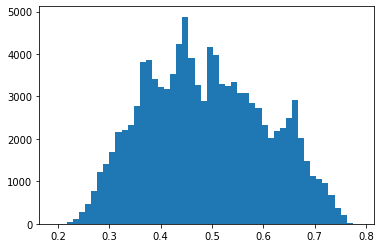

In [13]:
plt.hist([x['nvi_sum'] for x in best_results], bins=50);

In [14]:
best_results = sorted(best_results, key=lambda x: x["nvi_sum"])

In [15]:
for x in best_results:
    x['pred_iteration'] = int(x['pred_dataset'].split('_')[-1])
    x['affs_iteration'] = int(x['pred_dataset'].split('_')[-5])
    
    if '0gb' in x['pred_file']:
        x['gb'] = 0
    if '1gb' in x['pred_file']:
        x['gb'] = 1
    if '2gb' in x['pred_file']:
        x['gb'] = 2
    
    if 'arlo' in x['pred_file']:
        x['gt_type'] = "arlo"
    elif 'jan' in x['pred_file']:
        x['gt_type'] = "jan"
    else: x['gt_type'] = "voronoi"
        
    if "lite" in x["pred_file"]:
        x["net_size"] = "lite"
    elif "heavy" in x["pred_file"]:
        x["net_size"] = "heavy"
    else: x["net_size"] = "mid"
        
    x["EA"] = "no" if "noEA" in x['pred_file'] else "yes"
    x["LR"] = "yes" if "LR" in x['pred_file'] else "no"
    x["MR"] = "yes" if "MR" in x['pred_file'] else "no"

In [19]:
#plot a selection
results_to_plot = [x for x in best_results \
                    if x['nvi_sum'] < 0.2 \
#                     and "dense" not in x["pred_dataset"] \
#                     and "disk_1/" not in x["pred_dataset"] \
                    #and "disk_1-obj_002" in x["pred_dataset"]
                    #if 'sigma' not in x['sigma']
                  ]
len(results_to_plot)

2

In [20]:
results_to_plot[0]

{'raw_file': '/scratch/04101/vvenu/sparsity/epi/data/crop_N_511_final_crop_ds2.zarr',
 'labels_dataset': 'labels',
 'labels_mask': 0,
 'pred_file': '/scratch/04101/vvenu/sparsity/epi/affs_nets/affs/A/2d_crop_N_511_final_crop_ds2.zarr',
 'pred_dataset': 'mtlsd/obj_050/rep_1/3d_affs_14000_from_stacked_affs_10000',
 'roi': '[[2350, 11250, 7500], [4700, 37500, 37500]]',
 'downsampling': 0,
 'denoising': 0,
 'normalize_preds': 1,
 'background_mask': 0,
 'randomize_strides': 1,
 'clean_up': 1,
 'algorithm': 'kruskal',
 'stride': '[1, 2, 2]',
 'neighborhood': '[[-1, 0, 0], [0, -1, 0], [0, 0, -1], [-2, 0, 0], [0, -2, 0], [0, 0, -2], [-4, 0, 0], [0, -4, 0], [0, 0, -4], [-8, 0, 0], [0, -8, 0], [0, 0, -8], [0, -3, -7], [0, -6, -6], [0, -7, -3], [0, -7, 3], [0, -6, 6], [0, -3, 7]]',
 'rand_split': 0.7451399869584969,
 'rand_merge': 0.8668832052716067,
 'voi_split': 0.8807299390183854,
 'voi_merge': 0.6993414075063775,
 'nvi_split': 0.10784641361726698,
 'nvi_merge': 0.08563517527027091,
 'nid': 0.

KeyError: 'gb'

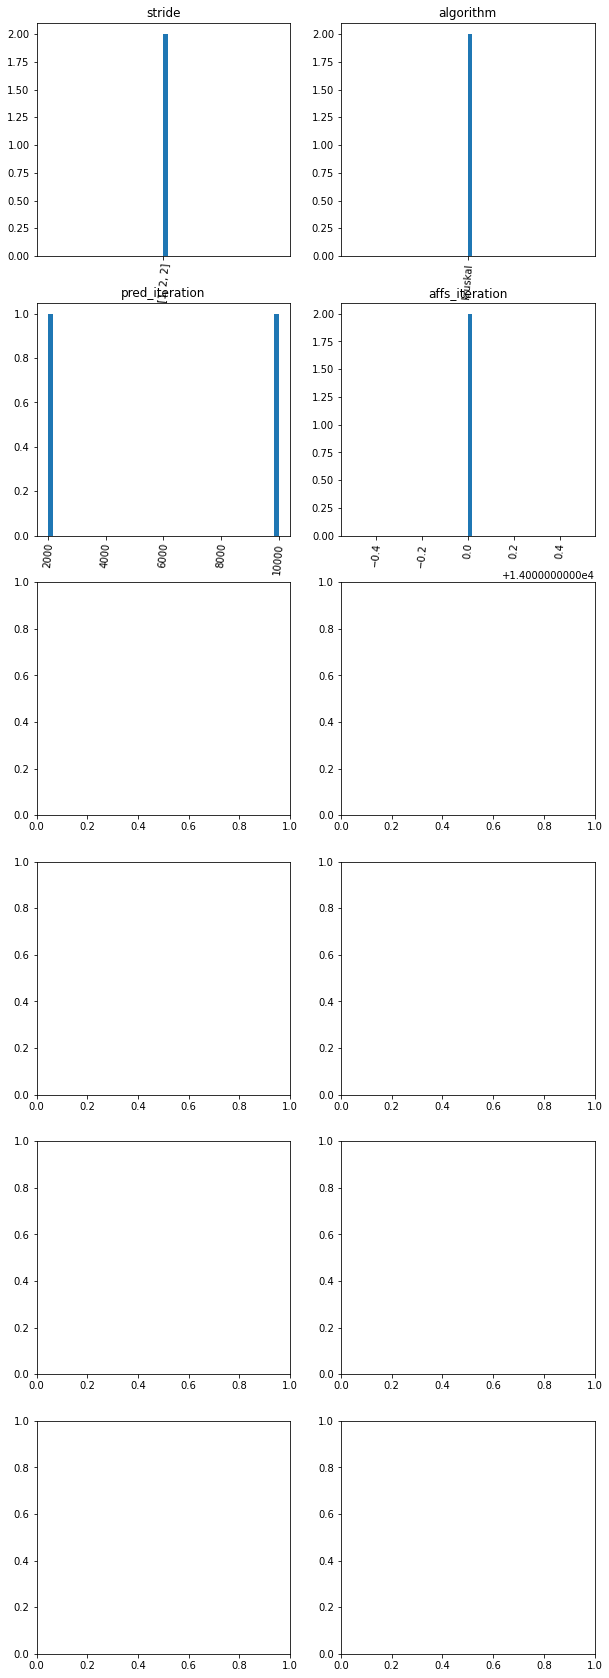

In [21]:
#plot histograms
fig, axes = plt.subplots(6,2,figsize=(10,30),sharex=False,sharey=False,squeeze=False)

row = 0

for plot_num,plot_name in enumerate(
    [
        'stride',
        'algorithm',
        'pred_iteration',
        'affs_iteration',
        'gb',
        'gt_type',
        'EA',
        'normalize_preds',
        'MR',
        'net_size',
        'nvi_sum',
        'nid'
    ]):
    
    data = [x[plot_name] for x in results_to_plot]
    nbins = 50
    
    axes[row][plot_num % 2].hist(data,bins=nbins)
    axes[row][plot_num % 2].set_title(plot_name)
    axes[row][plot_num % 2].tick_params(axis='x', rotation=85)
    
    if plot_num % 2 == 1:
        row += 1
        
plt.tight_layout()